See `../ch07_Input_prep/072_Observed_data.ipynb` for data processing.

#### Notebook config

In [2]:
# %load ../../software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


##### Loading extra modules

In [4]:
import pandas as pd
from fullwavepy.seismic.proteus import PROTEUS

##### Testing the `seismic` package

In [14]:
!python3 -m unittest fullwavepy.seismic.test.test_exps -v

test_read_metadata (fullwavepy.seismic.test.test_exps.TestPROTEUS) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.051s

OK


In [31]:
!python3 -m unittest fullwavepy.seismic.test.test_metadata -v

test_init (fullwavepy.seismic.test.test_metadata.TestBox3d) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


In [80]:
!python3 -m unittest fullwavepy.seismic.test.test_data -v

test_init (fullwavepy.seismic.test.test_data.TestDataSet) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


# Pre-processing

## Data format

#### File-name format

In [31]:
exp.dataset['lanvz']['801'].fname

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/land/Santorini/segy_local_coords//MGL1521_L801_1.sgy'

In [29]:
exp.dataset['obsvz']['101'].fname

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S101_1.sgy'

In [18]:
exp.dataset['obshy']['101'].fname

'/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S101_4.sgy'

#### OBS data SEGY headers

In [32]:
exp.dataset['obshy']['101'].surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00833137 s, 384 kB/s

14231 traces:
tracl    1 14231 (1 - 14231)
tracr    1 14231 (1 - 14231)
fldr     9882 46337 (9882 - 46337)
tracf    4101
ep       1 60 (4 - 33)
trid     1
offset   86 81658 (38344 - 43117)
gelev    458
selev    -12
sdepth   12
swdep    18 1273 (744 - 435)
gwdep    458
scalel   1
scalco   1
sx       -57515 60987 (60987 - -16327)
sy       -11369 28177 (17709 - -1028)
gx       22644
gy       17418
counit   1
tstat    17
ns       12000
dt       5000
gain     1
igc      16
year     2015
day      327 341 (327 - 341)
hour     0 23 (5 - 14)
minute   0 59 (34 - 4)
sec      0 59 (5 - 36)
timbas   0 999 (95 - 428)
ntr      14231

Shot coordinate limits:
	North(-36820,28177) South(-5596,-11369) East(60987,17709) West(-57515,5507)

Receiver coordinate limits:
	North(22644,17418) South(22644,17418) East(22644,17418) West(22644,17418)

Midpoint coordinate limits:
	North(-7088,22797.5) South(8524,3024.5) Eas

#### Land data SEGY headers

In [33]:
exp.dataset['lanvz']['801'].surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00730552 s, 438 kB/s

13696 traces:
tracl    1 13696 (1 - 13696)
tracr    1 13696 (1 - 13696)
fldr     9882 44056 (9882 - 44056)
tracf    1801
ep       1 60 (4 - 36)
trid     1
offset   4108 62941 (62941 - 55571)
gelev    -361
selev    -12
sdepth   12
swdep    18 1273 (744 - 488)
scalel   1
scalco   1
sx       -57515 60987 (60987 - -51470)
sy       -11369 28177 (17709 - 6929)
gx       2615
gy       -5833
counit   1
tstat    17
laga     -4999 5000 (-800 - -3873)
ns       7000
dt       10000
year     2015
day      327 340 (327 - 340)
hour     0 23 (5 - 23)
minute   0 59 (34 - 25)
sec      0 59 (4 - 40)
timbas   4

Shot coordinate limits:
	North(-36820,28177) South(-5596,-11369) East(60987,17709) West(-57515,5507)

Receiver coordinate limits:
	North(2615,-5833) South(2615,-5833) East(2615,-5833) West(2615,-5833)

Midpoint coordinate limits:
	North(-17102.5,11172) South(-1490.5,-8601) East(31801,5938) West(-27450,-163

## Data size

In [1]:
# calculate 
print('Single-channel OBS and land data take %s GB and %s GB of disk space, respectively.' % ((88 * 655 / 1000),(369 * 31 / 1000)))

Single-channel OBS and land data take 57.64 GB and 11.439 GB of disk space, respectively.


#### Check on disk

In [4]:
!du -h {exp.dataset['obshy']['101'].fname}

655M	/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S101_4.sgy


In [6]:
!ls {exp.dataset['obshy']['101'].path}/*_4.sgy | wc -l

88


In [10]:
!du -hs {exp.dataset['lanvz']['801'].fname}

du: cannot access '{exp.dataset[lanvz][801].fname}': No such file or directory


In [43]:
!ls {exp.dataset['lanvz']['801'].path}/*_1.sgy | wc -l

31


## Coordinates

In [118]:
%%time 
x1 = +8.0e3
x2 = +2.5e4   
y1 = -3.0e3   
y2 = +1.5e4    
z1 = 0
z2 = +4.0e3
b01 = Box3d(x1, x2, y1, y2, z1, z2)

h = 50 # m
X = np.arange(x1, x2+h, h)
Y = np.arange(y1, y2+h, h)
Z = np.arange(z1, z2+h, h)

from fullwavepy.seismic.proteus import CoordSystemPROTEUS
xx, yy = np.meshgrid(X,Y, indexing='ij')
XY = np.zeros((2,len(xx.flatten())))
XY[0,:] = xx.flatten()
XY[1,:] = yy.flatten()
R = CoordSystemPROTEUS.rotation_matrix(25.5)
X, Y = R.dot(XY)

with open('kol_rotated.xyz', 'w') as f:
    for x, y in zip(X,Y):
        for z in Z:
            f.write('%s %s %s\n' % (
                "{:10.5f}".format(x),"{:10.5f}".format(y),"{:6.0f}".format(z)))

CPU times: user 25.3 s, sys: 692 ms, total: 26 s
Wall time: 28.1 s


In [109]:
%%time 
lon0 = 25.3971
lat0 = 36.4042
!cat 'kol_rotated.xyz' | proj -I +proj=tmerc +lat_0={lat0} +lon_0={lon0} +ellps=WGS84 +units=m +datum=WGS84 > kol_lon_lat_dep.txt 

In [117]:
# Box 
# in seconds
dt = 0.0025  
ns = 2000
# in metres
dx = 50      
x1 = +8.0e3     
x2 = +2.5e4    
y1 = -3.0e3    
y2 = +1.5e4    
z1 = 0 
z2 = +4.0e3    
box = [x1, x2, y1, y2, z1, z2]
# bigger_box = box
geom_bigger = dict(dt=dt, ns=ns, dx=dx, box=box)
lll(40)
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
p14 = ProjInv('p14', path=path, **geom_bigger, cat=0) # Lasso selected.

In [115]:
vp = p14.o.vp.it[160].read()
vp = vp.flatten()
with open('kol_it160_vp.txt', 'w') as f:
    for v in vp:
        f.write('%s\n' % "{:10.5f}".format(v))

In [121]:
!paste -d' ' 'kol_lon_lat_dep.txt' 'kol_it160_vp.txt' > 'kol_it160_lon_lat_dep_vp.txt'

### sandbox

In [35]:
!alpha=q; echo 1 1 1 | awk '{x=$1*cos('"$alpha"')-$2*sin('"$alpha"'); y=$2*cos('"$alpha"')+$1*sin('"$alpha"'); print x,y,$3}' 

-1.34207 0.445923 1


In [61]:
lon0 = 25.3971
lat0 = 36.4042
!alpha=0.445058959258554; echo 0 0 0 | awk '{x=$1*cos('"$alpha"')-$2*sin('"$alpha"'); y=$2*cos('"$alpha"')+$1*sin('"$alpha"'); print x, y, $3}'          

0 0 0


### Check

In [10]:
fname = 'data/segy_headers.csv'
segy = pd.read_csv(fname)
segy.columns

Index(['level_0', 'cdpt', 'counit', 'day', 'delrt', 'dt', 'ep', 'f2', 'fldr',
       'gain', 'gelev', 'gwdep', 'gx', 'gy', 'hour', 'igc', 'index', 'laga',
       'minute', 'ns', 'ntr', 'offset', 'scalco', 'scalel', 'sdepth', 'sec',
       'selev', 'swdep', 'sx', 'sy', 'timbas', 'tracf', 'tracl', 'tracr',
       'trid', 'tstat', 'year'],
      dtype='object')

In [37]:
segy[segy.tracf==1801].head(1)[['tracf','gx','gy','gelev','gwdep']]

tracf    gx    gy  gelev  gwdep
2504656   1801  2615 -5833    361    NaN

In [38]:
segy[segy.tracf==1828].head(1)[['tracf','gx','gy','gelev','gwdep']]

tracf    gx    gy  gelev  gwdep
2866495   1828  6780 -2820     45    NaN

In [36]:
_, x, y, z, _ = segy[segy.tracf==1801].head(1)[['tracf','gx','gy','gelev','gwdep']]
x, y, z

('gx', 'gy', 'gelev')

In [38]:
segy[segy.tracf==1828].head(1)[['tracf','gx','gy','gelev','gwdep']]

tracf    gx    gy  gelev  gwdep
2866495   1828  6780 -2820     45    NaN

In [39]:
from fullwavepy.seismic.proteus import CoordSystemPROTEUS
CoordSystemPROTEUS.local2geogr(6780,-2820,45)

(25.478858888888887, 36.40753861111111, 45.0)

## Station response

See the manuscript.

# Initial QC

#### Alg.
Merge two files `OBS_stations.csv` and `recs.csv`.

In [9]:
qc = pd.read_csv('data/OBS_stations.csv')
recs = pd.read_csv('data/recs.csv')
# select OBSes only:
obs = recs.loc[recs['id'].isin(qc['Station'])]

Three stations are missing from `obs` as they have no data and their SEGY files are not present.

In [34]:
for i in qc.Station:
    if i not in list(obs.id):
        print(i)

116
152
187


Let's exclude them from qc:

In [35]:
qc = qc.drop(qc.loc[qc.Station.isin([116,152,187])].index)
assert len(qc) == len(obs)

Merge

In [12]:
df = pd.concat([qc, obs], axis=1)
print(df.columns)
df = df.drop(columns='Unnamed: 0')
print(df.columns)

Index(['Station', 'Pool', 'Data logger', 'Bad VZ', 'Bad HY', '6Hz-Z',
       'Preferred', 'HZ RMS', 'HZ noise', 'VZ/HY signal', 'Comment (CP 2017)',
       'Comment (EH 2016)', 'Eval', 'Unnamed: 0', 'id', 'gx', 'gy', 'pool'],
      dtype='object')
Index(['Station', 'Pool', 'Data logger', 'Bad VZ', 'Bad HY', '6Hz-Z',
       'Preferred', 'HZ RMS', 'HZ noise', 'VZ/HY signal', 'Comment (CP 2017)',
       'Comment (EH 2016)', 'Eval', 'id', 'gx', 'gy', 'pool'],
      dtype='object')


#### Fig.
Plot initial-QC metadata from merged metadata.

In [15]:
# plot 
import plotly.express as px
fig = px.scatter(df, x='gx', y='gy',
                     hover_name='pool', text='id',
                     hover_data=['Comment (EH 2016)', 'Comment (CP 2017)'],  
                     width=800, height=400,
                )
fig.show(renderer="notebook")

#### Fig.
Plot bathymetry with `plotly`. See also `christi.ipynb`.

In [156]:
# import plotly.express as px
fig = px.imshow(np.random.rand(100,100))
fig.show()
# px.scatter(df, x='gx', y='gy', hover_name='id', width=1e3, height=400)

#### Fig.
Highlight a given shotline.

In [ ]:
%mi
df = md[md.tracf==4104]
eps = sorted(list(df['ep'].unique()))
@interact(ep=BoundedIntText(values=eps, min=min(eps), max=max(eps)))
def _(ep):
    plt.figure(figsize=(30,8))
    plt.scatter(df['sx'], df['sy'], c=df['ep'])
    plt.colorbar()
    line = df[df.ep == ep]
    plt.scatter(line['sx'], line['sy'], c='r', alpha=.5)
    plt.gca().set_aspect('equal')

#### Fig.
Example shot-line gather of a single OBS.

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


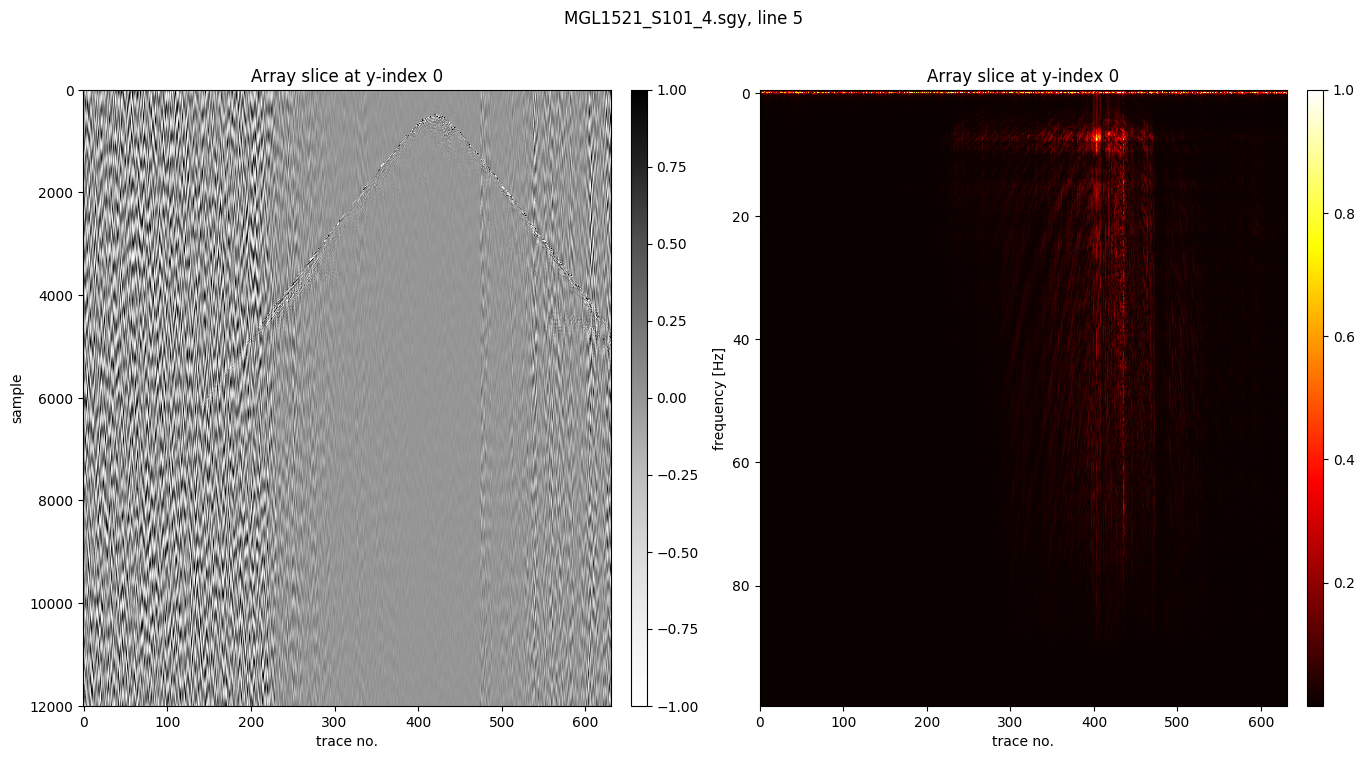

In [84]:
from fullwavepy.utils import qc_datafile
qc_datafile(exp.dataset['obshy']['101'], ep=5, norm='max')

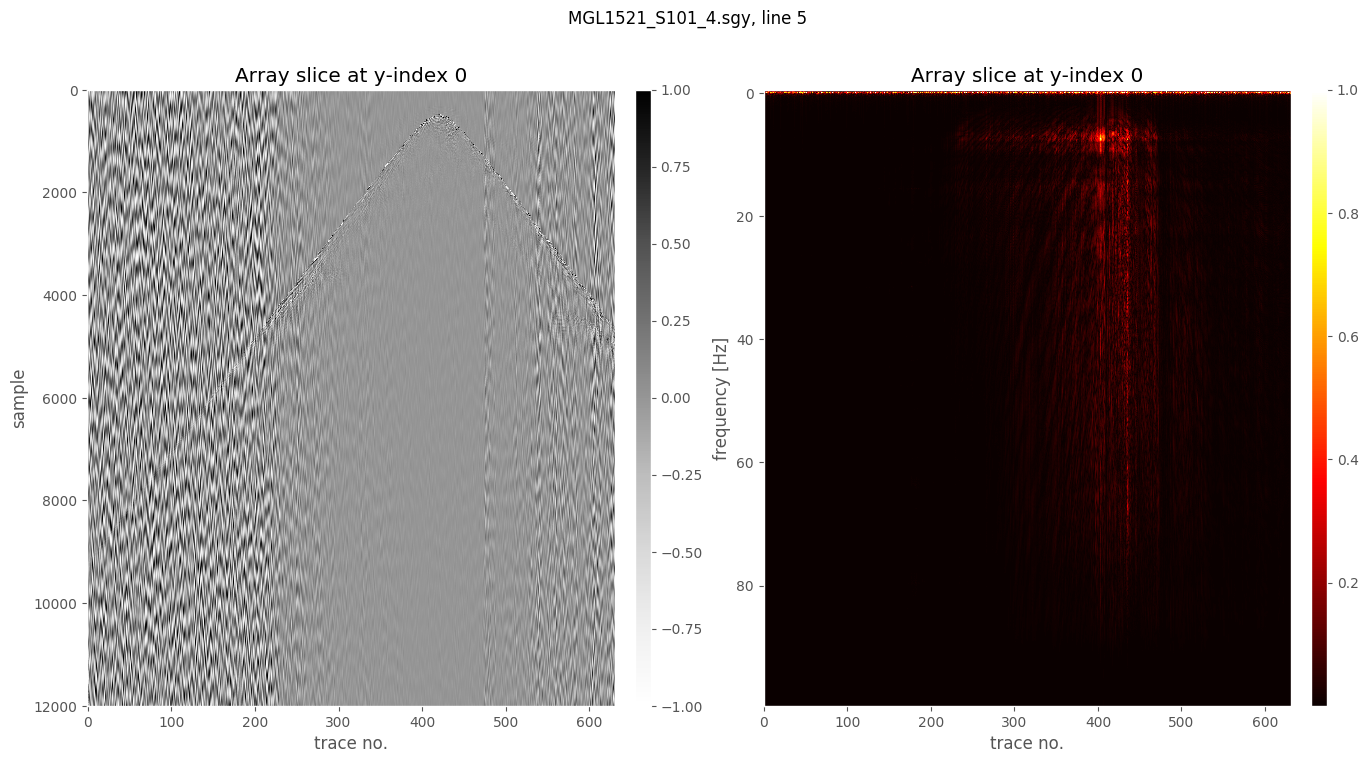

In [13]:
from fullwavepy.utils import qc_datafile
qc_datafile(exp.dataset['obshy']['101'], ep=5, norm='max')

# ...